# Oil Well Data Analysis and Exploration



This presents an analysis of synthetic oil well data, including production volume, operating costs, well locations, API gravity, well depth, well type, and well pressure. The goal is to explore the data, derive insights, and visualize key relationships and trends.

<div style="position:relative;">
  <img src="image2.jpg" style="width:400px; opacity:0.8;">
</div>


## Importing Necessary Libraries

Let's start by importing the necessary libraries for data analysis and visualization.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data
Next, we'll load the oil well data from the CSV file and display some basic information about the DataFrame.

In [19]:
df = pd.read_csv('oil_well_data.csv')

In [20]:
# Convert 'Production Date' to datetime
df['Production Date'] = pd.to_datetime(df['Production Date'])

In [21]:
# Extract the year from the 'Production Date' column
df['Year'] = df['Production Date'].dt.year

In [22]:
# Calculate the weight categories based on 'API Gravity'
df['Weight of Crude Oil'] = pd.cut(df['API Gravity'], bins=[0, 22, 31, np.inf], labels=['Heavy', 'Medium', 'Light'])

# Data Exploration
In this section, we'll explore the loaded data and calculate summary statistics for numerical columns.

In [23]:
# Display basic information about the DataFrame
print(df.head())

  Well ID Production Date  Production Volume (BBL/day)  \
0  Well_1      2022-03-04                   155.764515   
1  Well_1      2019-09-25                    80.193546   
2  Well_1      2019-09-15                   259.418591   
3  Well_1      2017-05-31                   959.352419   
4  Well_1      2020-02-25                   559.416687   

   Operating Costs (USD/day) Well Location Weight of Crude Oil  API Gravity  \
0                2339.202397        Abqaiq               Heavy    15.925342   
1                 799.279541        Abqaiq               Heavy    11.590701   
2                3895.707155        Abqaiq              Medium    28.640735   
3               14392.592910        Abqaiq              Medium    25.512856   
4                8393.486704        Abqaiq              Medium    27.400479   

   Well Depth (Feet) Well Type  Well Pressure (PSI)  Year  
0         891.224747  Offshore          2734.675561  2022  
1        3655.962381   Onshore          2655.913924  201

In [24]:
print(df.columns)

Index(['Well ID', 'Production Date', 'Production Volume (BBL/day)',
       'Operating Costs (USD/day)', 'Well Location', 'Weight of Crude Oil',
       'API Gravity', 'Well Depth (Feet)', 'Well Type', 'Well Pressure (PSI)',
       'Year'],
      dtype='object')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Well ID                      20000 non-null  object        
 1   Production Date              20000 non-null  datetime64[ns]
 2   Production Volume (BBL/day)  20000 non-null  float64       
 3   Operating Costs (USD/day)    20000 non-null  float64       
 4   Well Location                20000 non-null  object        
 5   Weight of Crude Oil          20000 non-null  category      
 6   API Gravity                  20000 non-null  float64       
 7   Well Depth (Feet)            20000 non-null  float64       
 8   Well Type                    20000 non-null  object        
 9   Well Pressure (PSI)          20000 non-null  float64       
 10  Year                         20000 non-null  int32         
dtypes: category(1), datetime64[ns](1), float6

In [26]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

                     Production Date  Production Volume (BBL/day)  \
count                          20000                 20000.000000   
mean   2019-01-03 12:41:28.320000256                   524.725942   
min              2015-01-01 00:00:00                    50.066451   
25%              2016-12-31 00:00:00                   287.108517   
50%              2018-12-30 00:00:00                   522.152917   
75%              2021-01-04 06:00:00                   762.263584   
max              2022-12-31 00:00:00                   999.839364   
std                              NaN                   273.570136   

       Operating Costs (USD/day)   API Gravity  Well Depth (Feet)  \
count               20000.000000  20000.000000       20000.000000   
mean                 6541.651439     26.981899        2753.652440   
min                   496.701640     10.000487         500.028809   
25%                  3469.729963     15.949690        1632.083029   
50%                  6273.563367 

# Data Visualization
Now, we'll create various visualizations to gain insights into the data.

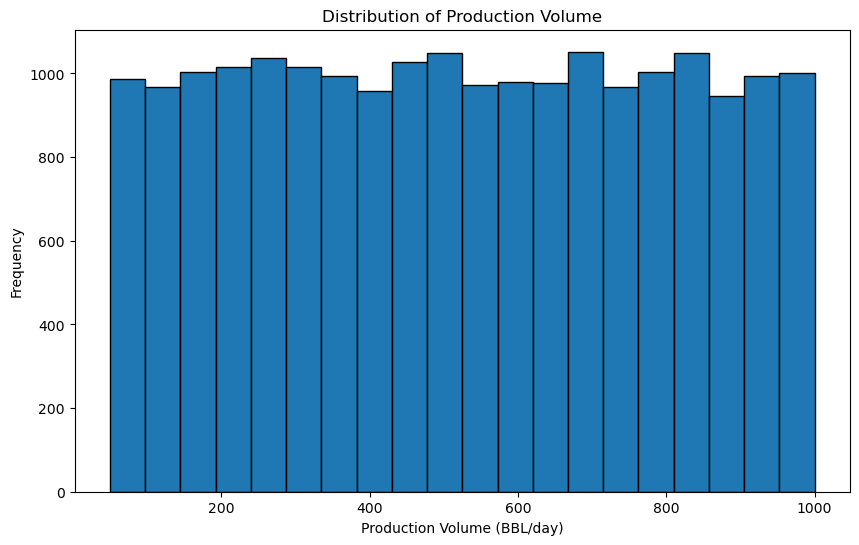

In [27]:
# Plot histograms for numerical variables
plt.figure(figsize=(10, 6))
plt.hist(df['Production Volume (BBL/day)'], bins=20, edgecolor='k')
plt.xlabel('Production Volume (BBL/day)')
plt.ylabel('Frequency')
plt.title('Distribution of Production Volume')
plt.show()

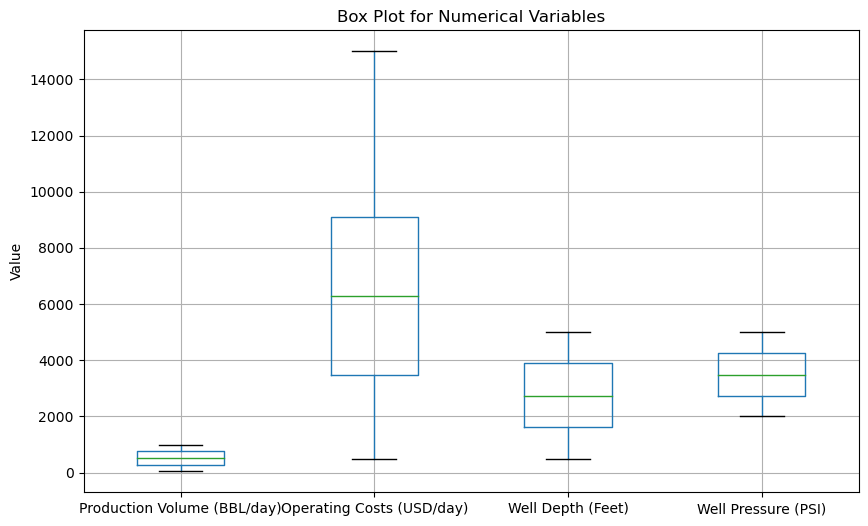

In [28]:
# Plot box plots for numerical variables
plt.figure(figsize=(10, 6))
df.boxplot(column=['Production Volume (BBL/day)', 'Operating Costs (USD/day)', 'Well Depth (Feet)', 'Well Pressure (PSI)'])
plt.ylabel('Value')
plt.title('Box Plot for Numerical Variables')
plt.show()

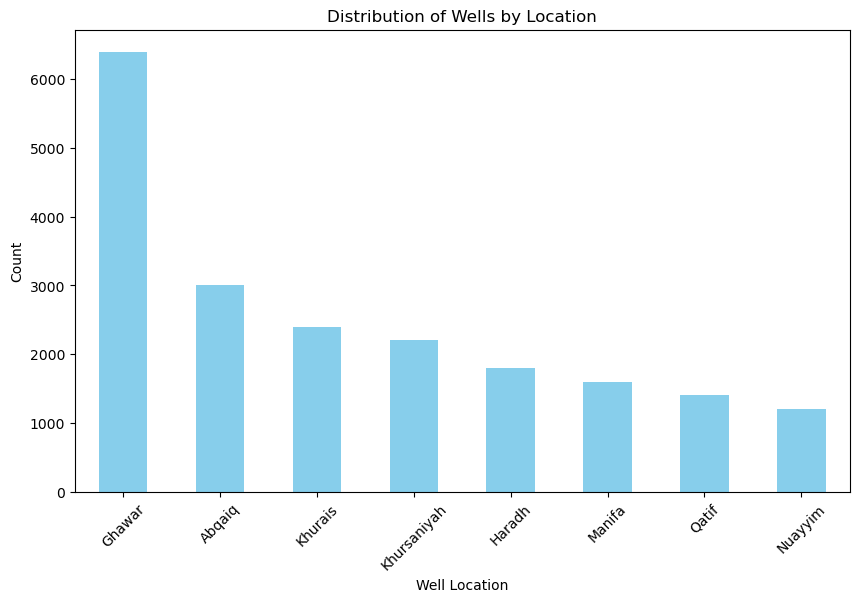

In [29]:
# Plot bar chart for the distribution of wells by location
plt.figure(figsize=(10, 6))
df['Well Location'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Well Location')
plt.ylabel('Count')
plt.title('Distribution of Wells by Location')
plt.xticks(rotation=45)
plt.show()

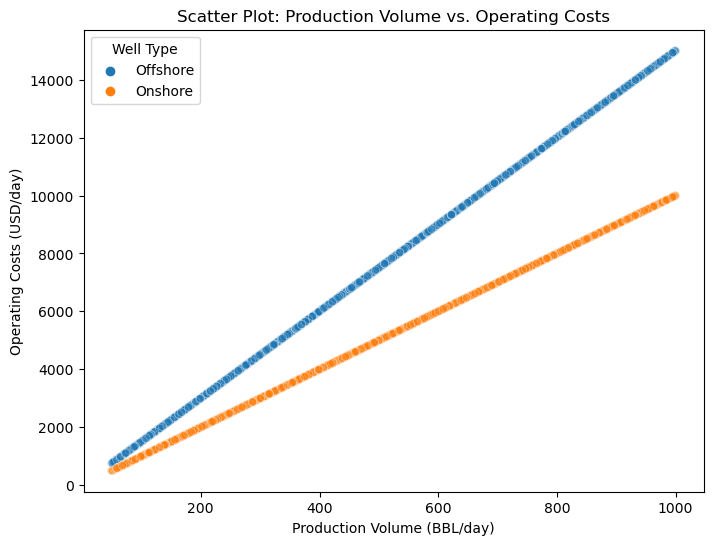

In [30]:
# Scatter plot for production volume vs. operating costs with well type differentiation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Production Volume (BBL/day)', y='Operating Costs (USD/day)', alpha=0.5, hue='Well Type')
plt.xlabel('Production Volume (BBL/day)')
plt.ylabel('Operating Costs (USD/day)')
plt.title('Scatter Plot: Production Volume vs. Operating Costs')
plt.show()

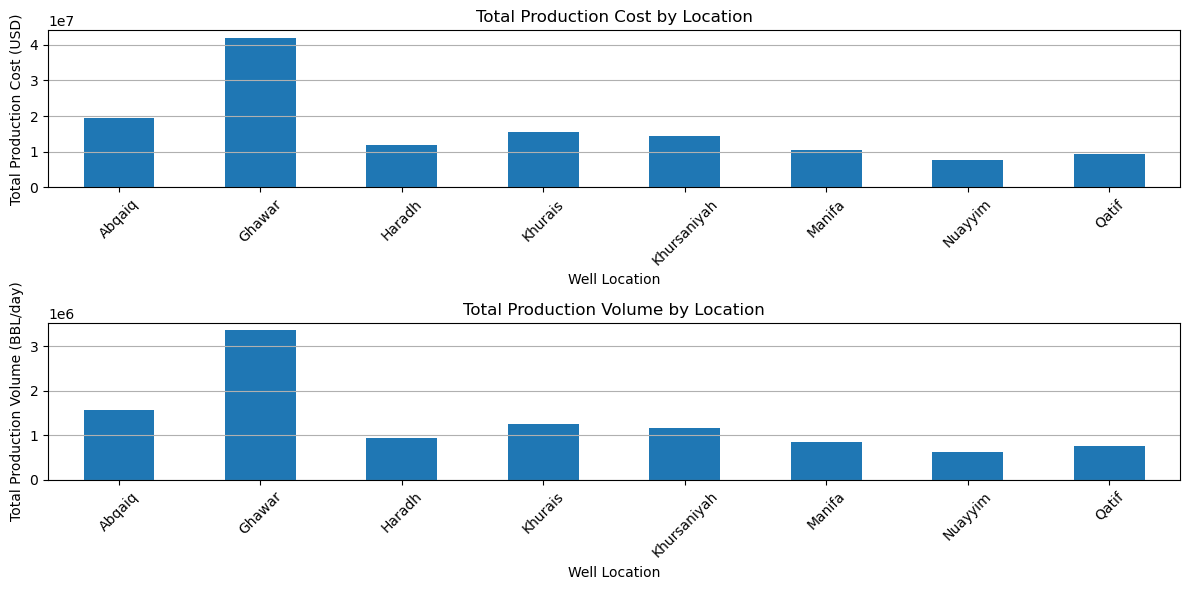

In [31]:
# Group data by 'Well Location' and calculate total production cost and volume for each location
production_cost_by_location = df.groupby('Well Location')['Operating Costs (USD/day)'].sum()
production_volume_by_location = df.groupby('Well Location')['Production Volume (BBL/day)'].sum()

# Plot bar charts for total production cost and volume by location
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
production_cost_by_location.plot(kind='bar')
plt.xlabel('Well Location')
plt.ylabel('Total Production Cost (USD)')
plt.title('Total Production Cost by Location')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.subplot(2, 1, 2)
production_volume_by_location.plot(kind='bar')
plt.xlabel('Well Location')
plt.ylabel('Total Production Volume (BBL/day)')
plt.title('Total Production Volume by Location')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

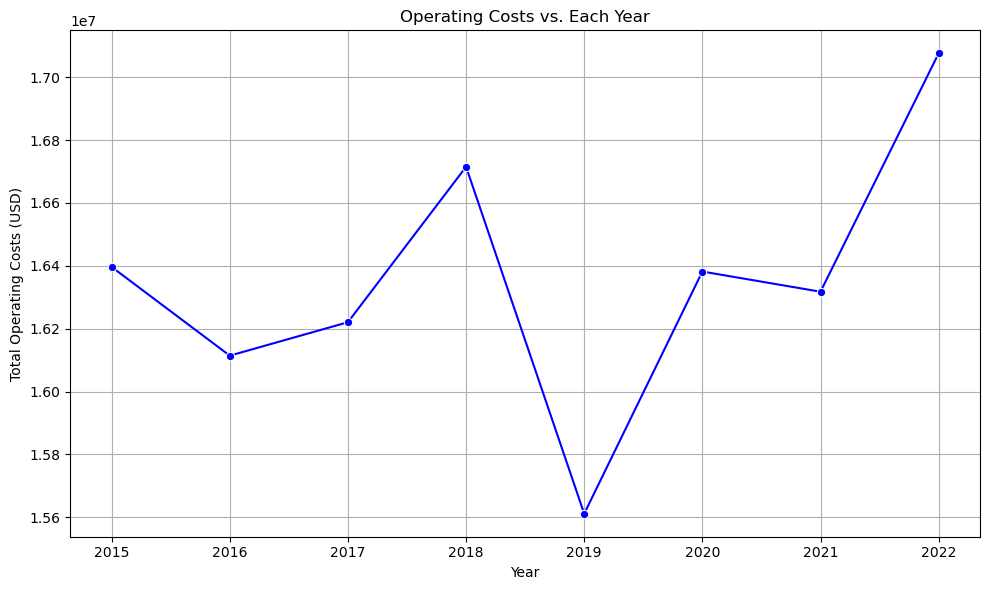

In [32]:
# Group the data by year and calculate the total operating costs for each year
annual_operating_costs = df.groupby('Year')['Operating Costs (USD/day)'].sum()

# Create a line plot for operating costs vs. each year
plt.figure(figsize=(10, 6))
sns.lineplot(data=annual_operating_costs, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Operating Costs (USD)')
plt.title('Operating Costs vs. Each Year')
plt.grid(True)
plt.tight_layout()
plt.show()


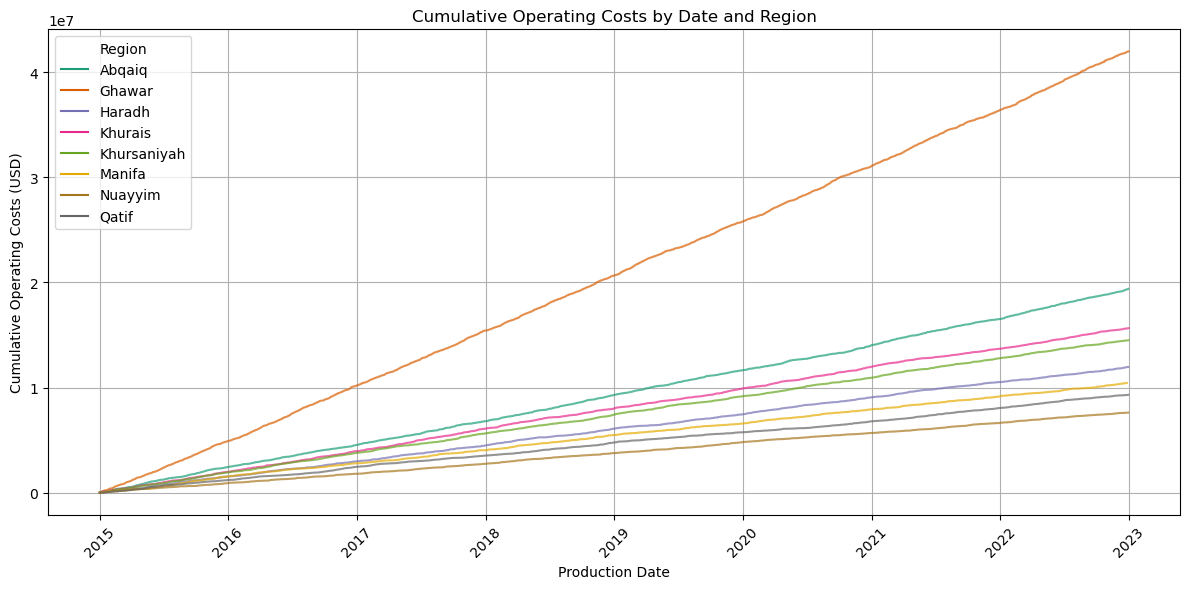

In [33]:
# Create an area plot for cumulative operating costs by date and region
df_sorted = df.sort_values(by='Production Date')
cumulative_costs_by_region = df_sorted.groupby(['Well Location', 'Production Date'])['Operating Costs (USD/day)'].sum().groupby('Well Location').cumsum()
cumulative_costs_by_region = cumulative_costs_by_region.reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=cumulative_costs_by_region, x='Production Date', y='Operating Costs (USD/day)', hue='Well Location', palette='Dark2', alpha=0.7)

plt.xlabel('Production Date')
plt.ylabel('Cumulative Operating Costs (USD)')
plt.title('Cumulative Operating Costs by Date and Region')
plt.legend(title='Region', loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

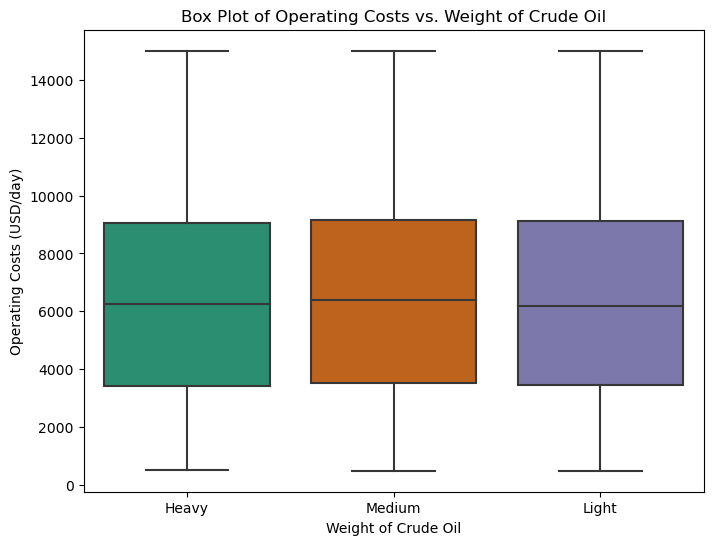

In [34]:
# Plot box plot for operating costs vs. weight of crude oil
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Weight of Crude Oil', y='Operating Costs (USD/day)', palette='Dark2')
plt.xlabel('Weight of Crude Oil')
plt.ylabel('Operating Costs (USD/day)')
plt.title('Box Plot of Operating Costs vs. Weight of Crude Oil')
plt.show()

# Oil Well Data Analysis Insights

1. **Production Volume**: The 'Production Volume' follows a dynamic distribution with a touch of right skewness, unveiling the diverse potential of oil wells.

2. **Offshore vs. Onshore**: The high seas demand a higher price! Operating costs are greater for offshore wells, making onshore wells the more cost-effective option.

3. **Profitable Partnership**: Witness a fruitful partnership! Production Volume and Operating Costs exhibit a positive correlation, especially for onshore wells.

4. **Majestic Oil Havens**: Behold Ghawar, Abqaiq, and Manifa! These oil havens reign supreme in total production cost and volume.

5. **Rising Profits**: Ascending profits with intriguing twists! Experience a positive trend in cumulative operating costs over time, with thrilling fluctuations based on location.

6. **Crude Mystery**: The enigma of lighter crude! Operating costs soar for wells with lighter crude oil, adding intrigue to the oil exploration journey.



